In [1]:
import cv2 as cv

events = [i for i in dir(cv) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


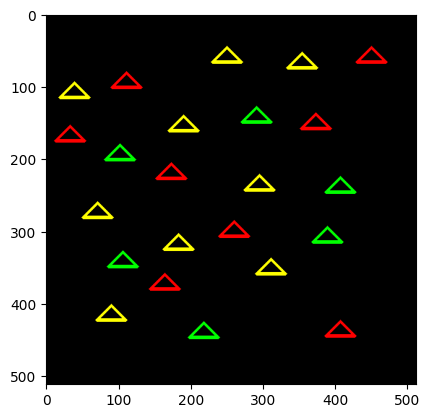

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img =  np.zeros((512,512,3), np.uint8)

triangle_size = 20  # اندازه مثلث نسبت به نقطه کلیک
color = (0, 255, 255)  # BGR

def click(event, x, y, flags, param):
    global points
    if event == cv.EVENT_LBUTTONDOWN:
        p1 = (x, y)
        p2 = (x - triangle_size, y + triangle_size)
        p3 = (x + triangle_size, y + triangle_size)
        pts = np.array([p1, p2, p3], dtype=np.int32)
        # pts_reshaped = pts.reshape((-1, 1, 2))
        # cv.fillPoly(img, [pts_reshaped], (color))
        cv.polylines(img, [pts], True, color, 3)
        cv.imshow('img', img)

cv.namedWindow('img')
cv.setMouseCallback('img', click)

while True:
    cv.imshow('img', img)
    key = cv.waitKey(1) & 0xFF 
    if key == ord('r'):
        color = (0,0,255)
    elif key == ord('g'):
        color = (0,255,0)
    elif key == ord('b'):
        color = (255,0,0)
    elif key == 27:
        break

cv.destroyAllWindows()
plt.imshow(img[...,::-1])
    

In [2]:
import numpy as np
def draw_circle(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(img, (x, y), 20, (150, 0, 200), 3)

img = np.zeros((512, 512, 3), np.uint8)

cv.namedWindow('img')
cv.setMouseCallback('img', draw_circle)

while True:
    cv.imshow('img', img)
    if cv.waitKey(1) & 0xFF == 27: 
        break
cv.destroyAllWindows()

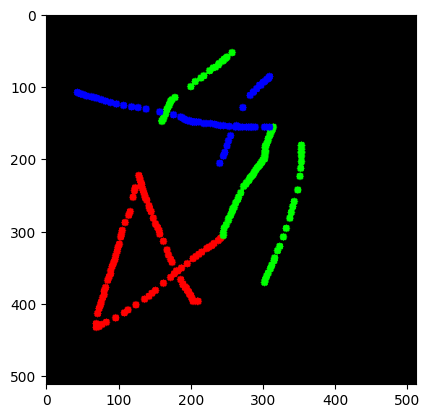

In [5]:
import matplotlib.pyplot as plt

drawing = False     # true if mouse is pressed
color = (0,255,0)

def brush(event, x, y, flags, param):
    global drawing, color
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            cv.circle(img, (x,y), 5, color, -1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False

img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('img')
cv.setMouseCallback('img', brush)

# while True:
#     cv.imshow('img', img)
#     if cv.waitKey(1) & 0xFF == 27:        # for color constant
#         break

while True:                                 # for changing color
    cv.imshow('img', img)
    k = cv.waitKey(1) & 0xFF
    if k == ord('b'):
        color = (255,0,0)
    elif k == ord('g'):
        color = (0,255,0)
    elif k == ord('r'):
        color = (0,0,255)
    elif k == 27:
        break

cv.destroyAllWindows()
plt.imshow(img[...,::-1])

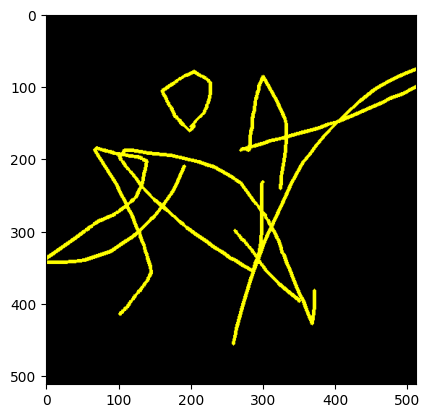

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((512,512,3), np.uint8)
drawing = False
ix = 0          # we can use topel like start_point = (0 , 0) insted of single point
iy = 0

def draw_line(event, x, y, flag, param):
    global drawing, ix, iy
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix = x
        iy = y
    if event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            cv.line(img, pt1=(ix, iy), pt2=(x, y), color=(0,255,255), thickness=3)
            ix = x
            iy = y
    if event == cv.EVENT_LBUTTONUP:
        drawing = False

cv.namedWindow('img')
cv.setMouseCallback('img', draw_line)

while True:
    cv.imshow('img', img)
    if cv.waitKey(1) & 0xFF == 27:
        break

cv.destroyAllWindows()
plt.imshow(img[...,::-1])

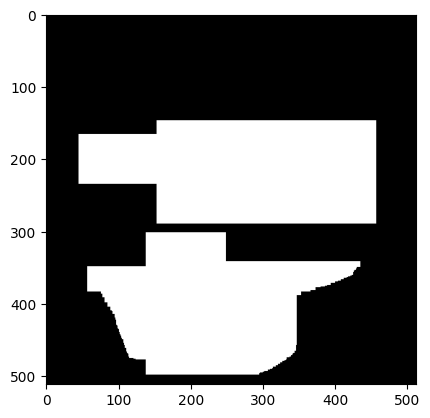

In [6]:
img = np.zeros((512,512,3), np.uint8)       # making a blank image
drawing = False
start_point = (0,0)

def drawing_rectangle(event, x, y, flag, param):
    global drawing, start_point
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            cv.rectangle(img, start_point, (x,y), (255,255,255), -1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False

cv.namedWindow('img')
cv.setMouseCallback('img', drawing_rectangle)

while True:
    cv.imshow('img', img)
    if cv.waitKey(1) & 0xFF == 27:
        break

cv.destroyAllWindows()
plt.imshow(img)

[[(437, 157), (915, 522)], [(998, 137), (1216, 617)]]


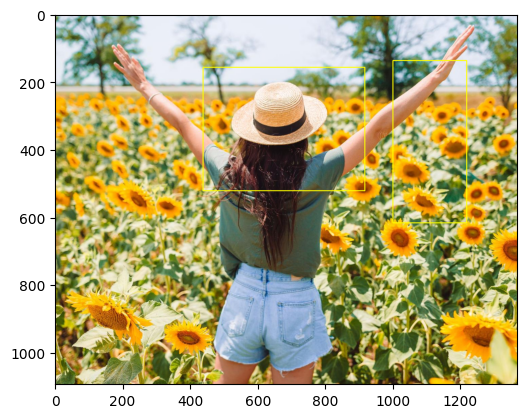

In [5]:
img = cv.imread(r'D:/test.computer_vision/l2/img/sunflowers.jpg')
clone = img.copy()

drawing = False
start_point = (0,0)
points = []

def draw_empty_rectangle(event, x, y, flags, param):
    global drawing, start_point, points
    if event == cv.EVENT_LBUTTONDOWN:
        start_point = (x,y)
    elif event == cv.EVENT_LBUTTONUP:
        points.append([start_point, (x,y)])
        cv.rectangle(img, pt1=start_point, pt2=(x,y), color=(0,255,255), thickness=2)
        cv.imshow('img', img)

cv.namedWindow('img')
cv.setMouseCallback('img', draw_empty_rectangle)

while True:
    cv.imshow('img', img)
    key = cv.waitKey(1) & 0xFF 
    
    if key == ord('r'):
        img = clone.copy()
        points = []

    elif key == 27:
        break

cv.destroyAllWindows()
plt.imshow(img[...,::-1])
print(points)

[[(455, 157), (891, 573)], [(194, 445), (334, 661)], [(1136, 290), (1240, 512)]]


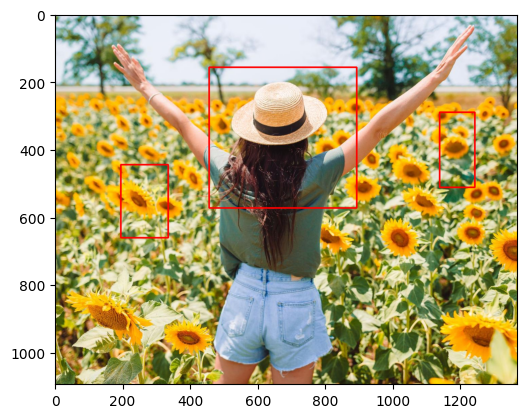

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'D:/test.computer_vision/l2/img/sunflowers.jpg')
clone = img.copy()
temp_img = img.copy()

drawing = False
start_point = (0,0)
points = []

def draw_empty_rectangle(event, x, y, flags, param):
    global drawing, start_point, points
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = (x,y)
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            temp_img = img.copy()
            cv.rectangle(temp_img, start_point, (x,y), (0,0,255), 2)
            cv.imshow('img', temp_img)
    if event == cv.EVENT_LBUTTONUP:
        points.append([start_point, (x,y)])
        drawing = False
        cv.rectangle(img, start_point, (x,y), (0,0,255), 3)
        cv.imshow('img', img)

cv.namedWindow('img')
cv.setMouseCallback('img', draw_empty_rectangle)

while True:
    if drawing == False:
        cv.imshow('img', img)
    key = cv.waitKey(1) & 0xFF
    if key == ord('r'):
        img = clone.copy()
        points = []
    elif key == 27:
        break

cv.destroyAllWindows()
plt.imshow(img[...,::-1])
print(points)

[[(130, 79), (377, 374)], [(517, 202), (819, 437)]]


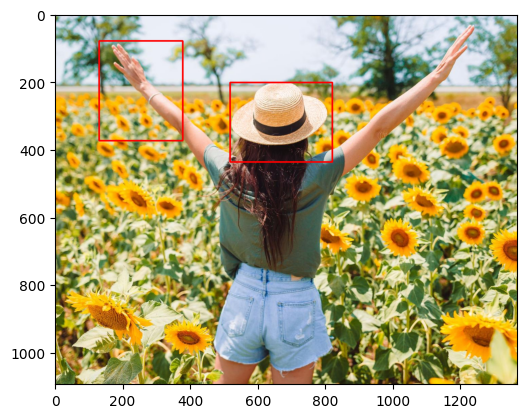

In [2]:
# import cv2 as cv
# import numpy as np
# import matplotlib.pyplot as plt

img = cv.imread(r'D:/test.computer_vision/l2/img/sunflowers.jpg')
clone = img.copy()
temp_img = img.copy()

drawing = False
start_point = (0,0)
points = []

def annotate_img_whit_undo(event, x, y, flags, param):
    global drawing, start_point, points
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = (x,y)
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            temp_img = img.copy()
            cv.rectangle(temp_img, start_point, (x,y), (0,0,255), 2)
            cv.imshow('img', temp_img)
    if event == cv.EVENT_LBUTTONUP:
        points.append([start_point, (x,y)])
        drawing = False
        cv.rectangle(img, start_point, (x,y), (0,0,255), 3)
        cv.imshow('img', img)

cv.namedWindow('img')
cv.setMouseCallback('img', annotate_img_whit_undo)

while True:
    if drawing == False:
        cv.imshow('img', img)
    key = cv.waitKey(1) & 0xFF
    if key == ord('r'):
        img = clone.copy()
        points = []
    if key == ord('z'):
        img = clone.copy()
        points.pop()
        for p in points:
            cv.rectangle(img, p[0], p[1], (0,0,255), 3)
    elif key == 27:
        break

cv.destroyAllWindows()
plt.imshow(img[...,::-1])
print(points)

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
scr1 = cv.imread(r'D:/test.computer_vision/l2/img/sunflowers.jpg')
crop_scr1 = scr1[300:800, 400:800]
crop_scr11 = crop_scr1.shape
scr2 = cv.imread(r'D:/test.computer_vision/l2/img/sun2.jpg')
scr22 = scr2.shape
print(crop_scr11)
print(scr22)

(500, 400, 3)
(540, 480, 3)


alpha:0.41


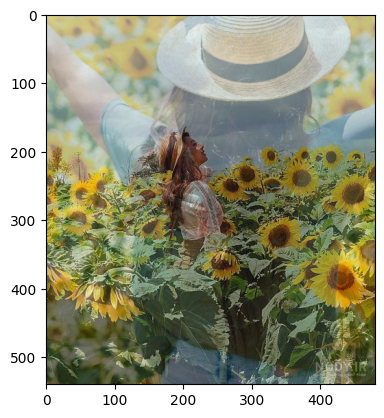

In [ ]:
alpha_max = 100
title_window = 'img_trackbar'
trackbar_name = 'alpha'

scr1 = cv.imread(r'D:/test.computer_vision/l2/img/sunflowers.jpg')
crop_scr1 = scr1[260:800, 360:840]
scr2 = cv.imread(r'D:/test.computer_vision/l2/img/sun2.jpg')

def trackbar(vall):
    global dst, alpha   # ذخیزه برای استفاده خارج از تابع
    alpha = vall / alpha_max
    beta = 1.0 - alpha
    dst = cv.addWeighted(crop_scr1, alpha, scr2, beta, 0)
    cv.imshow(title_window, dst)

cv.namedWindow(title_window)
cv.createTrackbar(trackbar_name, title_window, 0, alpha_max, trackbar)      # 0 < ... < alpha_max=100

trackbar(0)

cv.waitKey()
cv.destroyAllWindows()

plt.imshow(dst[...,::-1])
print('alpha:{}'.format(alpha))     # == print(f'alpha:{alpha}')

red: 202
green: 170
blue: 231


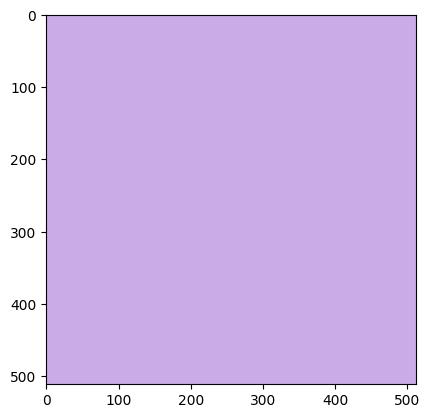

In [12]:
# cv.createTrrackbar(trackbar name, window name, start rang, end rang, function set)

def nothing(x):
    pass

img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('img')
cv.createTrackbar('r', 'img', 0, 255, nothing)
cv.createTrackbar('g', 'img', 0, 255, nothing)
cv.createTrackbar('b', 'img', 0, 255, nothing)

switch = 'off:on'
cv.createTrackbar(switch, 'img', 0, 1, nothing)

while True:
    cv.imshow('img', img)
    if cv.waitKey(1) & 0xFF == 27:
        break

    r = cv.getTrackbarPos('r', 'img')
    g = cv.getTrackbarPos('g', 'img')
    b = cv.getTrackbarPos('b', 'img')
    s = cv.getTrackbarPos(switch, 'img')
    if s == 0:
        img[:] = 0          # mean : all pix is black
    else:
        img[:] = [b,g,r]

cv.destroyAllWindows()
plt.imshow(img[...,::-1])
print('red:', r)
print('green:', g)
print('blue:', b)

(480, 640, 3)


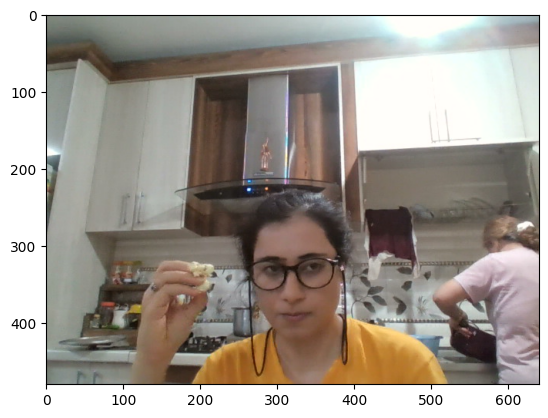

In [19]:
cap =  cv.VideoCapture(0)           # For video related commands

while True:
    ret, frame = cap.read()         # 2 output ret: true or false mean camera can read frame in camera or not and frane : input frame
    cv.imshow('webcame', frame)
    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()                       # when you typing release you can't use camera in other app
cv.destroyAllWindows()

print(frame.shape)
plt.imshow(frame[...,::-1])

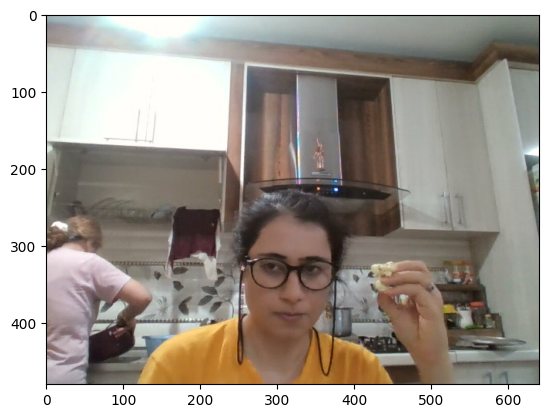

In [21]:
cap = cv.VideoCapture(0)

while True:
    ret, farme = cap.read()
    flipped = cv.flip(frame, 1)
    cv.imshow('webcame', flipped)
    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv.destroyAllWindows()

plt.imshow(flipped[...,::-1])

In [24]:
cap = cv.VideoCapture(0)

while True:
    ret, frame = cap.read()
    h, w, _ = frame.shape
    zeros = np.zeros([h, w], dtype='uint8')
    b, g, r = cv.split(frame)
    
    img_g = cv.merge([zeros, g, zeros])
    img_r = cv.merge([zeros, zeros, r])

    cv.imshow('webcam g', img_g)
    cv.imshow('webcam r', img_r)

    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv.destroyAllWindows()

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

cap = cv.VideoCapture(r'./video/temp_video.mp4')

while True:
    ret, frame = cap.read()
    if not ret:         # if ret == false
        print('exite')
        break
    cv.imshow('video', frame)
    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv.destroyAllWindows()

exite


In [10]:
fps = cap.get(cv.CAP_PROP_FPS)
print("FPS:", fps)

FPS: 0.0


In [ ]:
import cv2 as cv
import time

cap = cv.VideoCapture(r'./video/temp_video.mp4')

fps = cap.get(cv.CAP_PROP_FPS)
if fps == 0:
    fps = 30  # مقدار پیشفرض در صورت نامعتبر بودن

delay = int(1000 / fps)

while True:
    ret, frame = cap.read()
    if not ret:
        print('exite')
        break

    cv.imshow('video', frame)
    if cv.waitKey(delay) & 0xFF == 27:
        break

cap.release()
cv.destroyAllWindows()

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

cap = cv.VideoCapture(r'./video/temp2_video.mp4')

while True:
    ret, frame = cap.read()
    if not ret:         # if ret == false
        print('exite')
        break
    cv.imshow('video', frame)
    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv.destroyAllWindows()

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

cap = cv.VideoCapture(r'./video/temp_video.mp4')

while True:
    ret, frame = cap.read()
    if not ret:         # if ret == false
        print('exite')
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('video', gray)
    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv.destroyAllWindows()

exite


In [19]:
cap = cv.VideoCapture(r'./video/temp_video.mp4')

for i in range(0,18):
    print(cap.get(i))               # option 4,5 == frame w,h videos

print("w: ", cap.get(cv.CAP_PROP_FRAME_WIDTH))
print("h: ", cap.get(cv.CAP_PROP_FRAME_HEIGHT))
print("fps: ", cap.get(cv.CAP_PROP_FPS))

0.0
0.0
3.3333333333333335e-05
854.0
480.0
29.97002997002997
875967080.0
300.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
w:  854.0
h:  480.0
fps:  29.97002997002997


In [25]:
# FourCC یک کد 4 بایتی است که برای تعیین کدک ویدئو استفاده میشود. لیست کدهای موجود را میتوانبد در FourCC.org بیابید

# ffmpeg for work with video is better

cap = cv.VideoCapture(0)

fourcc = cv.VideoWriter_fourcc(*'xvid')     # cv.videowriter_fourcc('m','j','p','g') or cv.videowriter_fourcc(*'mjpg') for mjpg    -> * can split
out = cv.VideoWriter('output1.avi', fourcc, 20.0, (640, 480))       # (name video, fourcc, fps, camera dimention)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print('cant')
        break
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()
out.release()
cv.destroyAllWindows()

In [28]:
cap = cv.VideoCapture(r'./video/temp_video.mp4')

w = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# fourcc = cv.VideoWriter_fourcc(*'mjpg')
out = cv.VideoWriter('output2.avi', cv.VideoWriter_fourcc('m','j','p','g'), cap.get(cv.CAP_PROP_FPS), (w, h), False)    # false maen not with color chanel      

while True:       # == while cap.isOpened():  means camera work
    ret, frame = cap.read()
    if ret == True:
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        out.write(gray)
    else:
        print('done')
        break

cap.release()
out.release()
cv.destroyAllWindows()

done


In [ ]:
cap = cv.VideoCapture('rtsp://807e9439d5ca.entrypoint.cloud.wowza.com:1935/app-rC94792j/068b9c9a_stream2')      # realtime streaming protocol دوربین های مداربسته
                                                                                                                # به جای ادرس میشه ip هم نوشت و افزودن port هم با : است
while True:
    ret, frame = cap.read()
    cv.imshow('cctv', frame)
    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv.destroyAllWindows()

In [1]:
import cv2 as cv
import numpy as np
from PIL import ImageGrab       # To access the screen and take a screenshot

while True:
    frame = np.array(ImageGrab.grab())

    cv.imshow('screen', cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    if cv.waitKey(1) & 0xFF == 27:
        break

cv.destroyAllWindows()

In [2]:
screen_img = ImageGrab.grab()
screen_img.save('screen.jpg')

In [3]:
import cv2 as cv
import numpy as np
from PIL import ImageGrab       # To access the screen and take a screenshot

while True:
    frame = np.array(ImageGrab.grab(bbox=(500,500,1000,1000)))

    cv.imshow('screen', cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    if cv.waitKey(1) & 0xFF == 27:
        break

cv.destroyAllWindows()

In [ ]:
from mss import mss       # mss == multi-screen shot                                                                # faster method
from PIL import Image
import time

bounding_box = {'top':100, 'left':50, 'width':400, 'height':300 }

sct = mss()

while True:
    sct_img = sct.grab(bounding_box)
    cv.imshow('screen', np.array(sct_img))

    if cv.waitKey(1) & 0xFF == 27:
        break

cv.destroyAllWindows()

In [ ]:
# ! == Operating system command

import pafy
import cv2

url = 'https://www.youtube.com/watch?v=-VtXTkvDRW8'
video = pafy.new(url)

best = video.getbest(preftype="mp4")

capture = cv2.VideoCapture()
capture.open(best.url)

while (True):
    ret, frame = capture.read()
    if ret == True:
        cv2.imshow('src', frame)
        
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()  
                                                                                            # the information can get of video
print("Title: {}".format(video.title))
print("Rating: {}".format(video.rating))
print("Viewcount: {}".format(video.viewcount))
print("Author: {}".format(video.author))
print("Length: {}".format(video.length))
print("Duration: {}".format(video.duration))

streams = video.streams

for s in streams:
    print(s.resolution)
    print(s.extension)
    print(s.get_filesize())
    print(s.url)
                                                                                        # we can get just audio in video
audiostreams = video.audiostreams
for a in audiostreams:
     print(a.bitrate, a.extension, a.get_filesize())

audiostreams[1].download()

In [ ]:
# یک برنامه بنویسید که ویدیوی اصلی وبکم و همچنین تصویر وبکم بعد از اعمال  تصحیح روشنایی و تضاد (به روش اصلاح گاما) را نمایش دهد. این برنامه با فشردن q روی کیبورد باید بسته شود.

# یک برنامه ی ساده شبیه paint بنویسید که بتوان رنگ قلم و اندازه قلم را تغییر داد. برای تغییر اندازه قلم و همچنین رنگ قلم از Trackbar استفاده کنید. 4 ترک‌بار داشته باشید که به ترتیب سه رنگ R و G و  B و اندازه قلم را مشخص کند.